In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
from pprint import pprint

def NewtonPol(dat):
    """
    Implementación del interpolador de Newton
    Entradas:
    dat -- lista de puntos (x, y) en el plano

    Salidas:
    F -- tabla de diferencias divididas
    P -- función de interpolación
    """
    n = len(dat)-1
    F = [[0 for x in dat] for x in dat]  # crear tabla nula

    for i, p in enumerate(dat):  # condiciones iniciales
        F[i][0] = p[1]

    for i in range(1, n+1):  # tabla de diferencias divididas
        for j in range(1, i+1):
            F[i][j] = (F[i][j-1]-F[i-1][j-1])/(dat[i][0]-dat[i-j][0])

    def L(k, x):
        """Implementación funciones L_k(x)"""
        # polinomio $L_k(x)=\prod\limits_{i \leq k}(x-x_i)$
        out = 1
        for i, p in enumerate(dat):
            if i <= k:
                out *= (x - p[0])
        return out

    def P(x):
        """Implementación polinomio P(x)"""
        # $P(x)=f[x_0]+\sum_{k=1}^{n}f[x_0,x_1,\ldots,x_k]L_{k-1}(x)$
        newt = 0
        for i in range(1, n+1):
            newt += F[i][i]*L(i-1, x)
        return newt + F[0][0]

    return F, P

def CubicSplines(datos):
    """
    Implementación trazadores cúbicos
    Entradas:
    datos -- lista de puntos (x, y) en el plano ordenados por x

    Salidas:
    a -- vector de coeficientes (constantes)
    b -- vector de coeficientes (lineales)
    c -- vector de coeficientes (cuadráticos)
    d -- vector de coeficientes (cúbicos)
    """
    n = len(datos)-1
    # Inicializar vectores auxiliares
    A = [x[1] for x in datos]
    X = [x[0] for x in datos]
    H = [0.0 for x in range(n)]
    B = [0.0 for x in range(n+1)]
    C = [0.0 for x in range(n+1)]
    D = [0.0 for x in range(n+1)]
    alpha = [0.0 for x in range(n)]
    mu = [0.0 for x in range(n+1)]
    lo = [1.0 for x in range(n+1)]
    z = [0.0 for x in range(n+1)]

    # Crear vector $H$
    for i in range(n):
        H[i] = X[i+1]-X[i]

    # Crear vector $\alpha$
    for i in range(1, n):
        alpha[i] = (3/H[i])*(A[i+1]-A[i])-(3/H[i-1])*(A[i]-A[i-1])

    # Solucionar sistema tridiagonal
    for i in range(1, n):
        lo[i] = 2*(X[i+1]-X[i-1])-H[i-1]*mu[i-1]
        mu[i] = H[i]/lo[i]
        z[i] = (alpha[i]-H[i-1]*z[i-1])/lo[i]

    # Solucionar sistema tridiagonal
    for j in range(n-1, -1, -1):
        C[j] = z[j]-mu[j]*C[j+1]
        B[j] = (A[j+1]-A[j])/(H[j])-H[j]*(C[j+1]+2*C[j])/3
        D[j] = (C[j+1]-C[j])/(3*H[j])

    # Retornar vectores $A$, $B$, $C$, $D$
    return A[:-1], B[:-1], C[:-1], D[:-1]

def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=True):
    if (f(a)*f(b)>=0):
        if verbose:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

# Ejercicio
 Cierto experimento da como resultado los siguientes datos:
 [[0., 10], [0.2, 11.9873], [0.4, 12.9426], [0.6, 12.1635], [0.8, 9.64213], [1., 6.06531],
 [1.2, 2.54919], [1.4, 0.21057], [1.6, -0.261993], [1.8, 1.12677], [2., 3.67879], [2.2, 6.26764]]

- Encuentre el polinomio interpolador de Newton y grafiquelo.
- Encuentre el trazador cúbico natural y grafiquelo.
- Emplee el método de mínimos cuadrados para ajustar los datos a una regresión polinomial cúbica.
- ¿Cuál de los tres modelos utilizaría, y porqué?
- (Bonus) Con el modelo seleccionado, encuentre los cortes de la función encontrada con el $eje-x$ sobre el intervalo $[0, 2.2]$.

In [2]:
datos = [[0., 10], [0.2, 11.9873], [0.4, 12.9426], [0.6, 12.1635], [0.8, 9.64213], [1., 6.06531],
          [1.2, 2.54919], [1.4, 0.21057], [1.6, -0.261993], [1.8, 1.12677], [2., 3.67879], [2.2, 6.26764]]
x = np.array([item[0] for item in datos])
y = np.array([item[1] for item in datos])
T, P = NewtonPol(datos)
coef = list()
for i in range(len(T)):
    coef.append(T[i][i])
coef
pol_newton = lambda t: coef[0] + coef[1]*(t-x[0]) + coef[2]*(t-x[0])*(t-x[1]) + coef[3]*(t-x[0])*(t-x[1])*(t-x[2]) + coef[4]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])\
                       + coef[5]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])*(t-x[4]) + coef[6]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])*(t-x[4])*(t-x[5])\
                       + coef[7]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])*(t-x[4])*(t-x[5])*(t-x[6]) + coef[8]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])*(t-x[4])*(t-x[5])*(t-x[6])*(t-x[7])\
                       + coef[9]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])*(t-x[4])*(t-x[5])*(t-x[6])*(t-x[7])*(t-x[8])\
                       + coef[10]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])*(t-x[4])*(t-x[5])*(t-x[6])*(t-x[7])*(t-x[8])*(t-x[9])\
                       + coef[11]*(t-x[0])*(t-x[1])*(t-x[2])*(t-x[3])*(t-x[4])*(t-x[5])*(t-x[6])*(t-x[7])*(t-x[8])*(t-x[9])*(t-x[10])

In [4]:
pprint(T)

[[10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11.9873, 9.936499999999997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [12.9426, 4.776500000000006, -12.899999999999977, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [12.1635,
  -3.8954999999999993,
  -21.680000000000014,
  -14.633333333333395,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [9.64213,
  -12.606850000000001,
  -21.778375000000008,
  -0.16395833333332274,
  18.086718750000088,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [6.06531,
  -17.884100000000004,
  -13.193125000000006,
  14.308750000000003,
  18.090885416666655,
  0.004166666666566954,
  0,
  0,
  0,
  0,
  0,
  0],
 [2.54919,
  -17.580600000000004,
  0.7587499999999994,
  23.253125000000008,
  11.180468750000006,
  -6.910416666666649,
  -5.76215277777768,
  0,
  0,
  0,
  0,
  0],
 [0.21057,
  -11.693100000000001,
  14.71875000000001,
  23.26666666666669,
  0.016927083333353465,
  -11.163541666666655,
  -3.5442708333333384,
  1.5842013888888156,
  0,
  0,
  0,
  0],
 [-0.261993,
  -2.3628149999999977,
  23.32571

In [5]:
coef

[10,
 9.936499999999997,
 -12.899999999999977,
 -14.633333333333395,
 18.086718750000088,
 0.004166666666566954,
 -5.76215277777768,
 1.5842013888888156,
 0.5900743272569611,
 -0.32268436707722176,
 -0.010535830543239783,
 0.036189776688711275]

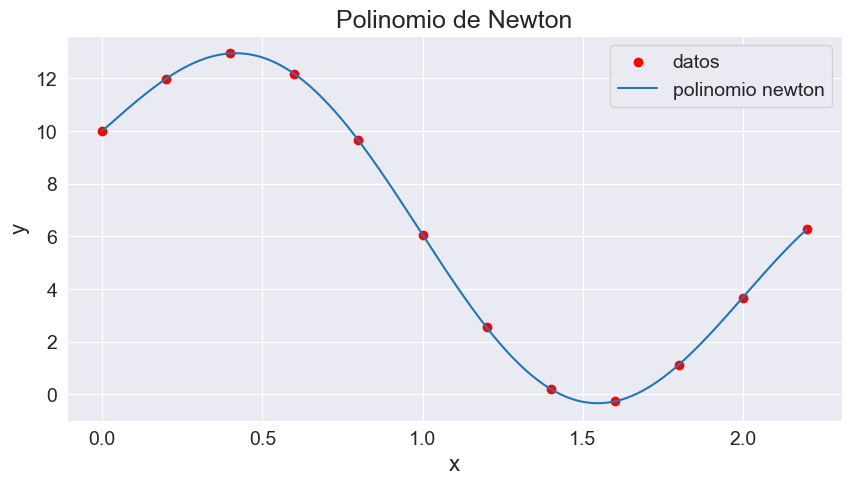

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
x0 = np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, pol_newton(x0), label='polinomio newton')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de Newton', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [60]:
a, b, c, d = CubicSplines(datos)
print("Vectores de coeficientes:")
print("A =", a)
print("B =", b)
print("C =", c)
print("D =", d)

Vectores de coeficientes:
A = [10, 11.9873, 12.9426, 12.1635, 9.64213, 6.06531, 2.54919, 0.21057, -0.261993, 1.12677, 3.67879]
B = [10.83792200218161, 8.13365599563677, 0.7664540152713162, -8.556472056722015, -16.04761578838325, -18.72591478974499, -15.4428250526368, -7.323884999707819, 2.5706200514680795, 10.78440479383552, 13.403505773189847]
C = [0.0, -13.521330032724201, -23.314679869103074, -23.299950490863594, -14.15576816744257, 0.7642731606338558, 15.651175524907105, 24.94352473973781, 24.52900051614164, 16.539923195695575, -3.4444182989239267]
D = [-22.53555005454033, -16.322249727298118, 0.02454896373246622, 15.240303872368369, 24.86673554679405, 24.81150394045542, 15.487248691384513, -0.6908737059936177, -13.31512886741011, -33.30723582436585, 5.740697164873206]


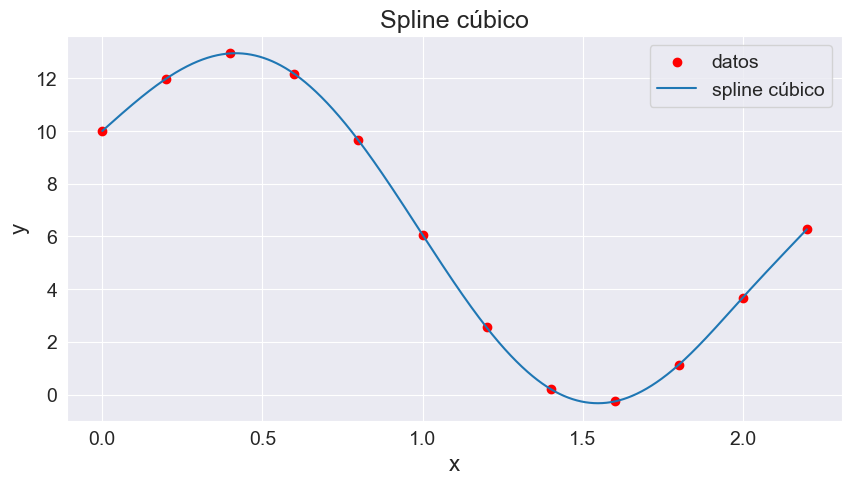

In [61]:
from scipy.interpolate import CubicSpline
p = CubicSpline(x, y, bc_type='natural')

fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, p(x0), label='spline cúbico')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Spline cúbico', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [62]:

sum_x_6 = np.sum(x**6)
sum_x_5 = np.sum(x**5)
sum_x_4 = np.sum(x**4)
sum_x_3 = np.sum(x**3)
sum_x_2 = np.sum(x**2)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_yx = np.sum(x*y)
sum_yx_2= np.sum(y*x**2)
sum_yx_3= np.sum(y*x**3)
a = np.array([[sum_x_6, sum_x_5, sum_x_4, sum_x_3],
              [sum_x_5, sum_x_4, sum_x_3, sum_x_2],
              [sum_x_4, sum_x_3 , sum_x_2, sum_x],
              [sum_x_3 , sum_x_2, sum_x, len(x)]])
b = np.array([sum_yx_3, sum_yx_2, sum_yx, sum_y])
q = np.linalg.solve(a, b)
print(q)
f_cubic = lambda x: q[0]*x**3 + q[1]*x**2 + q[2]*x + q[3]

[ 10.75401264 -32.29842903  17.7652521   10.06957085]


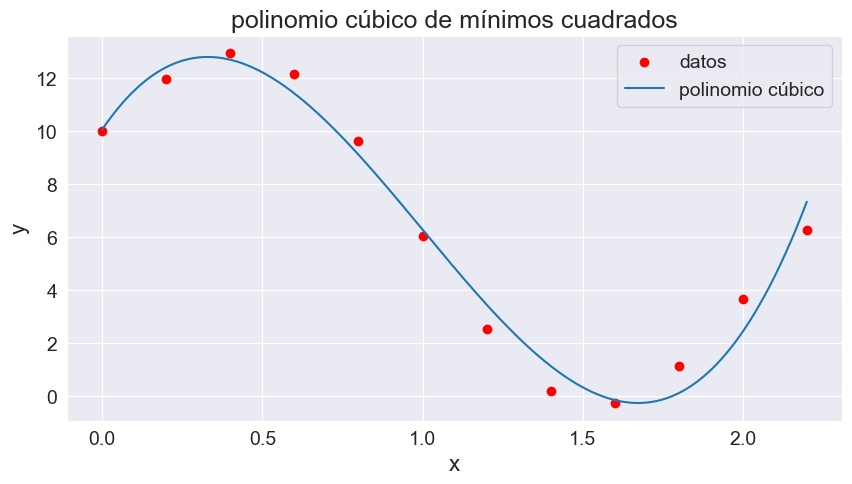

In [64]:
# Graficar los puntos
fig, ax = plt.subplots(figsize=(10, 5))
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, f_cubic(x0), label='polinomio cúbico')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'polinomio cúbico de mínimos cuadrados', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [76]:
print('Polinomio de Newton')
print(metodo_biseccion(pol_newton, 1, 1.5, verbose=False))
print(metodo_biseccion(pol_newton, 1.5, 2, verbose=False))

print('Spline cúbico')
print(metodo_biseccion(p, 1, 1.5, verbose=False))
print(metodo_biseccion(p, 1.5, 2, verbose=False))

print('Regresión cúbica')
print(metodo_biseccion(f_cubic, 1, 1.7, verbose=False))
print(metodo_biseccion(f_cubic, 1.7, 2, verbose=False))

Polinomio de Newton
1.432098388671875
1.663848876953125
Spline cúbico
1.432281494140625
1.664093017578125
Regresión cúbica
1.5619567871093747
1.7785522460937497


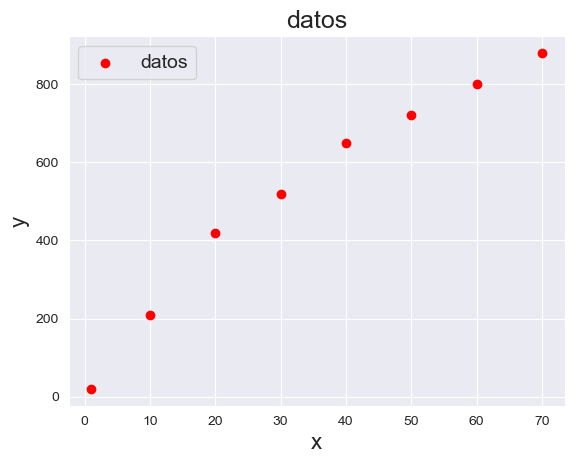

In [106]:
x, y = np.array([1, 10, 20, 30, 40, 50, 60, 70]), np.array([20, 210, 420, 520, 650, 720, 800, 880])
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'datos', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [107]:
sum_x_2 = np.sum(x**2)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_yx = np.sum(x*y)

a = np.array([[sum_x_2, sum_x],
              [sum_x, len(x)]])
b = np.array([sum_yx, sum_y])
sol = np.linalg.solve(a, b)
print(sol)

[ 11.9811178  106.66323721]


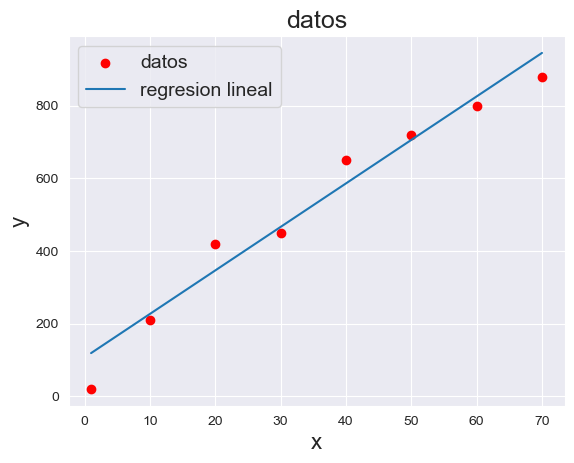

In [108]:
f_lineal = lambda x: sol[0]*x + sol[1]
x, y = np.array([1, 10, 20, 30, 40, 50, 60, 70]), np.array([20, 210, 420, 450, 650, 720, 800, 880])
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, f_lineal(x0), label='regresion lineal')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'datos', fontsize=18)
plt.legend(fontsize=14)
plt.show()

22.91246116980002 0.8911018519207337


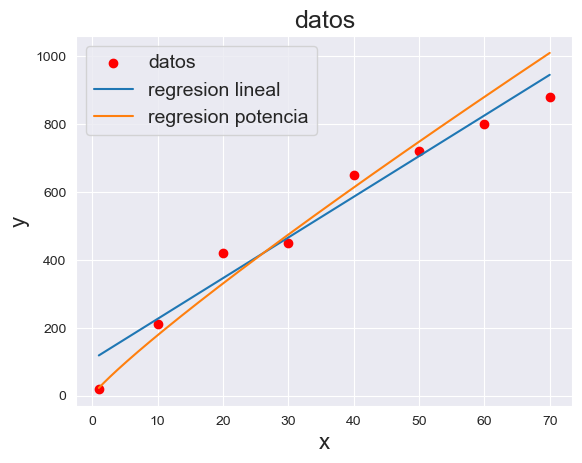

In [113]:
X, Y = np.log(x), np.log(y)
sum_X_2 = np.sum(X**2)
sum_X = np.sum(X)
sum_Y = np.sum(Y)
sum_YX = np.sum(X*Y)

a = np.array([[sum_X_2, sum_X],
              [sum_X, len(X)]])
b = np.array([sum_YX, sum_Y])
sol1 = np.linalg.solve(a, b)
a_0, a_1 = np.exp(sol1[1]), sol1[0]
print(a_0, a_1)
f_potencia = lambda x: a_0*x**a_1
x0 =np.linspace(min(x), max(x), 1000)
plt.scatter(x, y, label='datos', color='red')
plt.plot(x0, f_lineal(x0), label='regresion lineal')
plt.plot(x0, f_potencia(x0), label='regresion potencia')
ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'datos', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [110]:
f_potencia(120)

1632.4278701446428

In [111]:
g =lambda x: f_potencia(x) - 1500
metodo_biseccion(g, 70, 110, verbose=False)

109.13105010986328